#  Singlet Scalar Singlet (charged) fermion dark matter model

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *


## Check one point

In [3]:
a=hep(MODEL='SimplifiedDMSSSFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [9]:
pd.Series(a.LHA.blocks['MINPAR'].entries)

1    2.8000000E-01  # Lambda1IN
2      1.0000000E-02  # LamSHIN
3       0.0000000E+00  # LamSIN
4      2.0000000E+02  # MSinput
5     4.0000000E+02  # MDFinput
dtype: object

In [11]:
a.LHA.blocks['SPHENOINPUT'].entries[520]

'1.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '

In [18]:
pd.Series(a.LHA.blocks['YSIN'].entries)

_dict([(1, '0.000000E+00   # Ys(1)'),
       (2, '0.000000E+00   # Ys(2)'),
       (3, '0.000000E+00   # Ys(3)')])

In [14]:
v=a.vev
lambda_1=0.26
lambda_SH=1E-6
MS=99**2
MF=200
Yse=1
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['SPHENOINPUT'].entries[520]='0.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '
a.LHA.blocks['MINPAR'][1]='%0.8E       # lambda1'  %lambda_1
a.LHA.blocks['MINPAR'][2]='%0.8E       # lambdaSH'  %lambda_SH
a.LHA.blocks['MINPAR'][4]='%0.8E       # MS'  %MS
a.LHA.blocks['MINPAR'][5]='%0.8E       # MF' %MF
a.LHA.blocks['YSIN'][1]='%0.8E       # Ys(1)' %Yse
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,a.Series.sigmav

Omega h^2, SI proton, neutron = 3.58 2.275e-18 2.336e-18 8.15e-29


In [15]:
pd.Series(a.LHA_out_with_comments.blocks['MASS'].entries)

25             1.25548349E+02 # hh
6666635        9.90003062E+01 # ss
23             9.11887000E+01 # VZ
24            8.03497269E+01 # VWp
1            5.00000000E-03 # Fd_1
3            9.50000000E-02 # Fd_2
5            4.18000000E+00 # Fd_3
2            2.50000000E-03 # Fu_1
4            1.27000000E+00 # Fu_2
6            1.73500000E+02 # Fu_3
11           5.10998930E-04 # Fe_1
13           1.05658372E-01 # Fe_2
15           1.77669000E+00 # Fe_3
210000601     2.00000000E+02 # Fre
dtype: object

## Scan $m_{F}$

In [21]:
df=pd.DataFrame(np.logspace(np.log10(100),np.log10(1200),100))
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
df_masses=np.logspace(np.log10(100),np.log10(1200),100)
for MF in df_masses:
    if np.where(df_masses==MF)[0][0]%10==0: #find the index of the array entry
        print np.where(df_masses==MF)[0][0]
    a.LHA.blocks['MINPAR'][5]='%0.8E       #MF' %MF  # -> Fill a.Series.MDF
    a.runmicromegas(Direct_Detection=True)
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

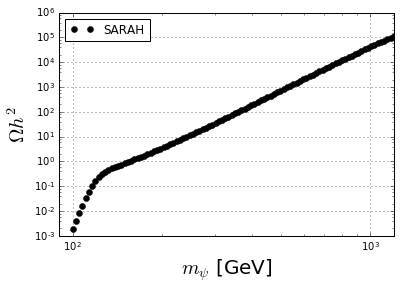

In [26]:
plt.loglog(df.MF,df.Omega_h2,'ko',label='SARAH')
plt.xlabel(r'$m_\psi$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.xlim(90,1200)
plt.legend(loc='best')
#plt.savefig('omega.pdf')

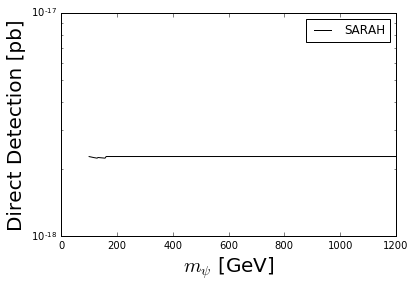

In [27]:
plt.semilogy(df.MF,df.proton_SI,'k-',label='SARAH')
plt.xlabel(r'$m_\psi$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
#plt.savefig('dd.pdf')

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)